In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 50
theta = np.random.uniform(0, 2 * np.pi, num_points)

x = np.cos(theta)
y = np.sin(theta)

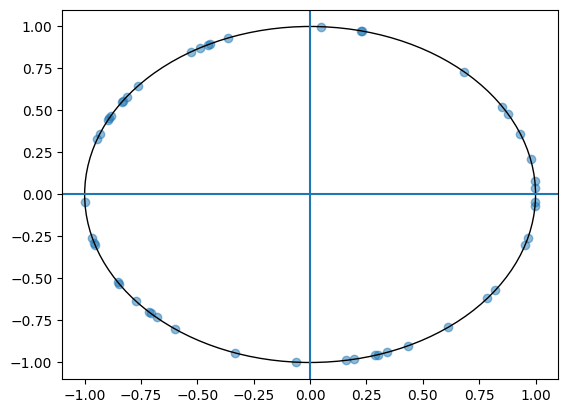

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)

circle = plt.Circle((0, 0), 1, fill=False)
ax.add_patch(circle)

ax.axhline(0)
ax.axvline(0)
plt.show()

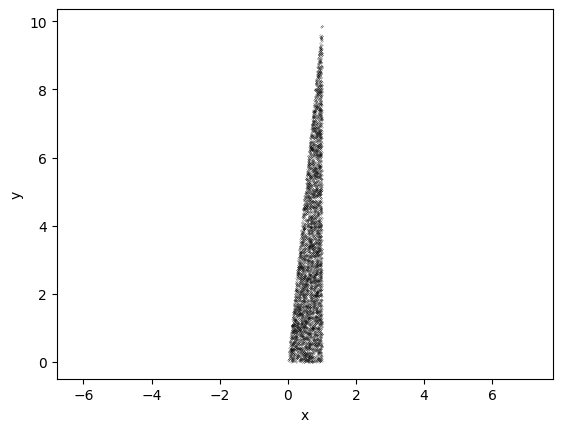

In [ ]:
#GOAL: uniformly sample N points inside a convex hull
#Defenition (convex hull). The convex hull of a collection {x1, ..., xn} of N points in Euclidean (3d) space, is defined as the set of points {y} such that
# y = sum_{i = 1}^N \alpha_i x_i$ where $\sum_{i = 1}^N \alpha_i = 1$, and $\alpha_i \leq 1$, e.g., if $X = {x_1, x_2}$, then the convex hull of $X$ is the line segment
# connecting $x_1$ to $x_2$.
# importantly, any point $y$ on this line segment can be expressed as $y = ax_1 + bx_2$ for some $a + b = 1$.
# e.g. Let $x_1 = {1, 1}$, and let $x_2 = {2, 2}$ and choose $a, b = 1/2$. Then $y = (1/2)(1, 1) + (1/2)(2, 2)$ is the midpoint of $x_1$ to $x_2$.
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as px
import math

num_points = 5000

X = [];
Y = [];
Z = [];

x1 = (0, 0, 0);
x2 = (1, 0, 0);
x3 = (1, 10, 0);

for i in range(0, num_points):

  one = random.random();
  two = random.random();

  top = max(one, two);
  btm = min(one, two);

  w1 = 1 - top;
  w2 = top - btm;
  w3 = btm;

  X = X + [w1*x1[0] + w2*x2[0] + w3*x3[0]];
  Y = Y + [w1*x1[1] + w2*x2[1] + w3*x3[1]];
  Z = Z + [w1*x1[2] + w2*x2[2] + w3*x3[2]];

marker = dict(size = 2, opacity = 1);
data = px.Scatter3d(x = X, y = Y, z = Z, mode = 'markers', marker = marker);

margin = dict(l=0, r=0, b=0, t=0);
layout = px.Layout(autosize=True, showlegend=True, margin = margin);

fig = px.Figure(data=data, layout=layout)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


plt.scatter(X,y, label='test', color='k', s=1, marker=".")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test')
plt.legend()
plt.show()
plt.legend()
plt.show()


In [ ]:
import random
import plotly.graph_objects as go
from scipy.spatial import ConvexHull

#tetrahedron, random points in space
hull_points = [
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 1],
    [0, 1, 0]
]

num_points = 500
X = []
Y = []
Z = []

#generate random points
for i in range(num_points):

    weights = []
    total = 0
    for j in range(len(hull_points)):
        w = random.random()
        weights.append(w)
        total += w
    #weights
    for j in range(len(weights)):
        weights[j] /= total

    x = 0
    y = 0
    z = 0
    for j in range(len(hull_points)):
        x += weights[j] * hull_points[j][0]
        y += weights[j] * hull_points[j][1]
        z += weights[j] * hull_points[j][2]

    X.append(x)
    Y.append(y)
    Z.append(z)

#convex hull & plotting
hull = ConvexHull(hull_points)
scatter = go.Scatter3d(
    x=X, y=Y, z=Z,
    mode='markers',
    marker=dict(size=2, opacity=1, color='blue')
)

#making a visual mesh for the hull, better look for points in space
mesh = go.Mesh3d(
    x=[p[0] for p in hull_points],
    y=[p[1] for p in hull_points],
    z=[p[2] for p in hull_points],
    i=[simplex[0] for simplex in hull.simplices],
    j=[simplex[1] for simplex in hull.simplices],
    k=[simplex[2] for simplex in hull.simplices],
    color='lightgrey', opacity=0.4
)
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)
fig = go.Figure(data=[mesh, scatter], layout=layout)
fig.show()